1. 파일로 제공되는 정형 데이터가 아닌 크롤링 으로 데이터를 수집해주세요
2. 임베딩 모델을 2 개 이상 적용해본 후 , Step5 의 결과에 따라 가장 좋은 모델을 선택해주세요 (ex) CBOW, Skip gram, GloVe , NN, FastText 등
3. RNN, LSTM 등 모델링을 하는 것이 아니기 때문에 이번 과제에서는 텍스트를 전처리, 토크나이징 , 임베딩 후 인사이트를 도출하는 경험 이 중요합니다. 주석 꼭 꼼꼼하게 달아주시고 데이터가 자유인만큼 참신한 인사이트 찾아주세요

### 1. 관심주제 : 영화 네티즌 리뷰를 크롤링해서 1917 영화에 대해 어떻게 생각하고 있는지 분석해보자.......!

시행착오 : 처음에 yes24에서 책 리뷰를 크롤링 하려했는데,,, 왜 안되는지 모르겠는데 실패함..
전체로 긁어와도 그 안에 리뷰가 안담겨있음... 왜지?

### 1. 크롤링

한페이지당 10개, 10page에 속한 리뷰를 가져오자

In [1]:
# crawling

import requests
from urllib.request import Request,urlopen
from bs4 import BeautifulSoup
import re 

In [2]:
url ='https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=187321&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='
page = int(1)
ment = []
for i in range(10):
        open=urlopen(url+str(page))
        #print(URL)
        html=open.read().decode('utf-8')
        soup = BeautifulSoup(html,"lxml")
        list = soup.body.find(class_="score_result").find_all('li')
        
        for i in range(10):
            ment.append(list[i].find(class_="score_reple").find('p').text.strip())
            
page+=1
print(ment)

['관람객\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t이 영화는 미쳤다. 넷플릭스가 일상화된 시대에 극장이 존재해야하는 이유를 증명해준다.', '충무로: 이거 어케하는거냐?', '관람객\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t아카데미에서 촬영상, 음향효과상, 시각효과상을 받은 이유가 고스란히 녹아있는 영화. IMAX로 관람하는걸 추천한다.', '관람객\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t처절한 전쟁 속에서, 한 남자를 영웅으로 만든 것은 훈장도 장군의 명령도 아닌 바로 옆 전우였다.', '촬영감독의 영혼까지 갈아넣은 마스터피스', '오스카 작품상 탔어도 할말 없었을것 같다.', '주인공을 카메라가 계속 따라가는데.. 세트장이 엄청 넓은거에 놀랐습니다. 직접 1차대전에 참전하는 느낌.. 이때당시 군인들 20년뒤 히틀러라는 극악의 악마로 자식들 다 전장에 몰리고 더 최악의 고통을 받을껀데 참.....', '관람객\n\n\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t관객을 1917년 4월 6일로 데려놓는 마법같은 작품', '닥터스트레인지의 판단력이 좋았다.

In [3]:
! pip install KoNLPy

In [4]:
! pip install -U gensim 

Requirement already up-to-date: gensim in c:\users\misung\anaconda3\lib\site-packages (3.8.1)


In [5]:
import numpy as np
import pandas as pd
from konlpy.tag import *
from gensim.models import Word2Vec, fasttext

### 2. 전처리 , 특수문자 제거

In [6]:
# 필요없는 문자 제거
ment = "".join(ment)
ment = re.sub('[-=+.,#/(?!:$}]', '', ment)
ment = re.sub('\n', '', ment)
ment = re.sub('\t', '', ment)
ment = re.sub('\r', '', ment)
ment = re.sub('관람객', '', ment)
# ment = re.sub('[0-9]', '', ment)

ment

'이 영화는 미쳤다 넷플릭스가 일상화된 시대에 극장이 존재해야하는 이유를 증명해준다충무로 이거 어케하는거냐아카데미에서 촬영상 음향효과상 시각효과상을 받은 이유가 고스란히 녹아있는 영화 IMAX로 관람하는걸 추천한다처절한 전쟁 속에서 한 남자를 영웅으로 만든 것은 훈장도 장군의 명령도 아닌 바로 옆 전우였다촬영감독의 영혼까지 갈아넣은 마스터피스오스카 작품상 탔어도 할말 없었을것 같다주인공을 카메라가 계속 따라가는데 세트장이 엄청 넓은거에 놀랐습니다 직접 1차대전에 참전하는 느낌 이때당시 군인들 20년뒤 히틀러라는 극악의 악마로 자식들 다 전장에 몰리고 더 최악의 고통을 받을껀데 참관객을 1917년 4월 6일로 데려놓는 마법같은 작품닥터스트레인지의 판단력이 좋았다아카데미 작품상이야 작품전체를 보는거니 기생충이 받을수도 있다고 보는데 감독상은 1917 줬어도 할말 없음 감독의 참신성이 빛을 발함 결론적으로 아카데미 작품상과 감독상을 1917이 받았어도 아무 할말 없는 것이이 영화는 미쳤다 넷플릭스가 일상화된 시대에 극장이 존재해야하는 이유를 증명해준다충무로 이거 어케하는거냐아카데미에서 촬영상 음향효과상 시각효과상을 받은 이유가 고스란히 녹아있는 영화 IMAX로 관람하는걸 추천한다처절한 전쟁 속에서 한 남자를 영웅으로 만든 것은 훈장도 장군의 명령도 아닌 바로 옆 전우였다촬영감독의 영혼까지 갈아넣은 마스터피스오스카 작품상 탔어도 할말 없었을것 같다주인공을 카메라가 계속 따라가는데 세트장이 엄청 넓은거에 놀랐습니다 직접 1차대전에 참전하는 느낌 이때당시 군인들 20년뒤 히틀러라는 극악의 악마로 자식들 다 전장에 몰리고 더 최악의 고통을 받을껀데 참관객을 1917년 4월 6일로 데려놓는 마법같은 작품닥터스트레인지의 판단력이 좋았다아카데미 작품상이야 작품전체를 보는거니 기생충이 받을수도 있다고 보는데 감독상은 1917 줬어도 할말 없음 감독의 참신성이 빛을 발함 결론적으로 아카데미 작품상과 감독상을 1917이 받았어도 아무 할말 없는 것이이 영화는 미쳤다 넷플릭스가 일상화

### 3. 토크나이징

In [7]:
# 토크나이징
twitter = Okt()  #twitter class 객체당!
komoran = Komoran()
kkma = Kkma()

In [8]:
def make_corpus(text):
    corpus = []
    for s in text.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(s)])
    return corpus

def make_corpus_rm_stopwords(text):
    corpus = []
    for s in text.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(s) if p[1] != "Josa"]) #임베딩에 필요없는 조사 빼고! 
    return corpus

In [9]:
# 토큰 모음집 만들기
corpus = make_corpus(ment)

#특수문자 제거
corpus = make_corpus_rm_stopwords(ment)

In [10]:
corpus

[['이/Noun',
  '영화/Noun',
  '미쳤다/Adjective',
  '넷플릭스/Noun',
  '일상/Noun',
  '화/Suffix',
  '된/Verb',
  '시대/Noun',
  '극장/Noun',
  '존재/Noun',
  '해야하는/Verb',
  '이유/Noun',
  '증명/Noun',
  '해준다/Verb',
  '충무로/Noun',
  '이/Determiner',
  '거/Noun',
  '어케/Noun',
  '하는거냐/Verb',
  '아카데미/Noun',
  '촬영상/Noun',
  '음향효과/Noun',
  '상/Suffix',
  '시/Modifier',
  '각/Modifier',
  '효과/Noun',
  '상/Suffix',
  '받은/Verb',
  '이유/Noun',
  '고스/Noun',
  '란/Noun',
  '히/Adverb',
  '녹아있는/Verb',
  '영화/Noun',
  'IMAX/Alpha',
  '로/Noun',
  '관람/Noun',
  '하/Suffix',
  '는걸/Noun',
  '추천/Noun',
  '한다/Verb',
  '처절한/Adjective',
  '전쟁/Noun',
  '속/Noun',
  '한/Verb',
  '남자/Noun',
  '영웅/Noun',
  '만든/Verb',
  '것/Noun',
  '훈장/Noun',
  '장군/Noun',
  '명령/Noun',
  '아닌/Adjective',
  '바로/Noun',
  '옆/Noun',
  '전우/Noun',
  '였다/Verb',
  '촬영감독/Noun',
  '영혼/Noun',
  '갈아/Adverb',
  '넣은/Verb',
  '마스터피스/Noun',
  '오스카/Noun',
  '작품/Noun',
  '상/Suffix',
  '탔어도/Verb',
  '할말/Verb',
  '없었을것/Adjective',
  '같다/Adjective',
  '주인공/Noun',
  '카메라/Noun',
  '계속/Noun'

### 4. 임베딩

In [11]:
#임베딩
from gensim.models import Word2Vec, fasttext

#임베딩(w2v_skipgram)모델 생성
# size : 벡터의 수
# min count : 출현 빈도
# sg : 0 -> CBOW, 1 -> Skip-Gram


# Skip_Gram 모델 생성
Skip_Gram_model = Word2Vec(corpus, size=20, window=3, min_count=5, workers=1, iter=1000, sg=1)


# CBOW 모델 생성 
CBOW = Word2Vec(corpus, size=25, window=3, min_count=5, workers=1, iter=1000, sg=0)


In [12]:
#index2word
words = Skip_Gram_model.wv.index2word #one-hot encoding알아서 해줌 
words

['상/Suffix',
 '작품/Noun',
 '아카데미/Noun',
 '할말/Verb',
 '감독/Noun',
 '영화/Noun',
 '이유/Noun',
 '이/Determiner',
 '것/Noun',
 '1917/Number',
 '이/Noun',
 '미쳤다/Adjective',
 '넷플릭스/Noun',
 '일상/Noun',
 '화/Suffix',
 '된/Verb',
 '시대/Noun',
 '극장/Noun',
 '존재/Noun',
 '해야하는/Verb',
 '증명/Noun',
 '해준다/Verb',
 '충무로/Noun',
 '거/Noun',
 '어케/Noun',
 '하는거냐/Verb',
 '촬영상/Noun',
 '음향효과/Noun',
 '시/Modifier',
 '각/Modifier',
 '효과/Noun',
 '받은/Verb',
 '고스/Noun',
 '란/Noun',
 '히/Adverb',
 '녹아있는/Verb',
 'IMAX/Alpha',
 '로/Noun',
 '관람/Noun',
 '하/Suffix',
 '는걸/Noun',
 '추천/Noun',
 '한다/Verb',
 '처절한/Adjective',
 '전쟁/Noun',
 '속/Noun',
 '한/Verb',
 '남자/Noun',
 '영웅/Noun',
 '만든/Verb',
 '훈장/Noun',
 '장군/Noun',
 '명령/Noun',
 '아닌/Adjective',
 '바로/Noun',
 '옆/Noun',
 '전우/Noun',
 '였다/Verb',
 '촬영감독/Noun',
 '영혼/Noun',
 '갈아/Adverb',
 '넣은/Verb',
 '마스터피스/Noun',
 '오스카/Noun',
 '탔어도/Verb',
 '없었을것/Adjective',
 '같다/Adjective',
 '주인공/Noun',
 '카메라/Noun',
 '계속/Noun',
 '따라가는데/Verb',
 '세트/Noun',
 '장이/Suffix',
 '엄청/Adverb',
 '넓은거에/Adjective',
 '놀랐습니다/Verb',
 '직

In [13]:
#index2word
words_c = CBOW.wv.index2word #one-hot encoding알아서 해줌 
words_c

['상/Suffix',
 '작품/Noun',
 '아카데미/Noun',
 '할말/Verb',
 '감독/Noun',
 '영화/Noun',
 '이유/Noun',
 '이/Determiner',
 '것/Noun',
 '1917/Number',
 '이/Noun',
 '미쳤다/Adjective',
 '넷플릭스/Noun',
 '일상/Noun',
 '화/Suffix',
 '된/Verb',
 '시대/Noun',
 '극장/Noun',
 '존재/Noun',
 '해야하는/Verb',
 '증명/Noun',
 '해준다/Verb',
 '충무로/Noun',
 '거/Noun',
 '어케/Noun',
 '하는거냐/Verb',
 '촬영상/Noun',
 '음향효과/Noun',
 '시/Modifier',
 '각/Modifier',
 '효과/Noun',
 '받은/Verb',
 '고스/Noun',
 '란/Noun',
 '히/Adverb',
 '녹아있는/Verb',
 'IMAX/Alpha',
 '로/Noun',
 '관람/Noun',
 '하/Suffix',
 '는걸/Noun',
 '추천/Noun',
 '한다/Verb',
 '처절한/Adjective',
 '전쟁/Noun',
 '속/Noun',
 '한/Verb',
 '남자/Noun',
 '영웅/Noun',
 '만든/Verb',
 '훈장/Noun',
 '장군/Noun',
 '명령/Noun',
 '아닌/Adjective',
 '바로/Noun',
 '옆/Noun',
 '전우/Noun',
 '였다/Verb',
 '촬영감독/Noun',
 '영혼/Noun',
 '갈아/Adverb',
 '넣은/Verb',
 '마스터피스/Noun',
 '오스카/Noun',
 '탔어도/Verb',
 '없었을것/Adjective',
 '같다/Adjective',
 '주인공/Noun',
 '카메라/Noun',
 '계속/Noun',
 '따라가는데/Verb',
 '세트/Noun',
 '장이/Suffix',
 '엄청/Adverb',
 '넓은거에/Adjective',
 '놀랐습니다/Verb',
 '직

In [14]:
# text 토큰 임베딩 벡터
vectors = Skip_Gram_model.wv.vectors
vectors

array([[ 0.15399338, -0.1428009 , -0.7587105 , ..., -0.21653134,
        -1.64082   ,  0.35352895],
       [-0.0927636 , -0.21268053,  0.00956215, ...,  0.10471469,
        -1.113164  ,  1.0428358 ],
       [ 0.22298907, -0.60433435,  0.2542829 , ..., -0.07225499,
        -0.46179616,  0.55887365],
       ...,
       [ 1.0788553 , -1.7798643 ,  0.44654003, ..., -0.46636257,
        -0.99277085, -0.36900494],
       [ 0.03388351, -1.1372752 ,  0.8014937 , ..., -0.48533353,
        -1.4329736 , -0.6606585 ],
       [ 0.941313  , -0.9846019 ,  1.1533606 , ..., -0.47247678,
        -1.1141995 , -0.36036927]], dtype=float32)

In [15]:
# text 토큰 임베딩 벡터
vectors_c =CBOW.wv.vectors
vectors_c

array([[-1.9520435 , -0.21213226, -2.755649  , ..., -1.6403064 ,
        -0.82090074, -2.4324417 ],
       [-2.4571834 , -1.5083526 , -1.7836561 , ..., -1.0367322 ,
        -0.41164526,  0.6606514 ],
       [-2.7656348 , -2.058989  , -2.3250325 , ..., -0.5643649 ,
         1.895057  , -1.8466574 ],
       ...,
       [ 2.6160796 ,  2.2293303 , -1.3277384 , ...,  0.10554487,
        -0.99634606, -2.9836862 ],
       [ 1.7480581 ,  1.9994669 ,  1.2286645 , ..., -0.9474003 ,
        -0.9764549 , -2.125391  ],
       [ 1.8202286 ,  2.4843774 ,  2.6370382 , ..., -0.64505804,
        -0.6000466 , -2.1281202 ]], dtype=float32)

In [16]:
# 토큰과 벡터 zip
Skip_Gram_model_result = dict(zip(words, vectors))
CBOW_model_result = dict(zip(words_c, vectors_c))

In [17]:
# 유사도 top5
# 두 벡터 사이의 코사인 유사도를 구해줍니다
print(Skip_Gram_model.most_similar('주인공/Noun', topn=5)) #유사한 top5개 보기  #word2vec 코사인 유사도! 

print(Skip_Gram_model.most_similar('전우/Noun', topn=5))

print(Skip_Gram_model.most_similar('음향효과/Noun', topn=5))

print(Skip_Gram_model.most_similar('처절한/Adjective', topn=5))

[('따라가는데/Verb', 0.8135499954223633), ('없었을것/Adjective', 0.8066525459289551), ('같다/Adjective', 0.795649528503418), ('카메라/Noun', 0.7923117876052856), ('계속/Noun', 0.7907864451408386)]
[('였다/Verb', 0.7832132577896118), ('촬영감독/Noun', 0.7831090688705444), ('옆/Noun', 0.782357931137085), ('아닌/Adjective', 0.7809076309204102), ('영혼/Noun', 0.7734767198562622)]
[('각/Modifier', 0.7969162464141846), ('시/Modifier', 0.7928828001022339), ('촬영상/Noun', 0.7885757088661194), ('하는거냐/Verb', 0.7872122526168823), ('어케/Noun', 0.7829784750938416)]
[('하/Suffix', 0.8004261255264282), ('한다/Verb', 0.7952351570129395), ('전쟁/Noun', 0.7930415868759155), ('속/Noun', 0.7865786552429199), ('추천/Noun', 0.7763877511024475)]


C:\Users\MiSung\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MiSung\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
C:\Users\MiSung\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
C:\Users\MiSung\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


In [18]:
print(CBOW.most_similar('주인공/Noun', topn=5))  #유사한 top5개 보기  #word2vec 코사인 유사도! 

print(CBOW.most_similar('전우/Noun', topn=5))

print(CBOW.most_similar('음향효과/Noun', topn=5))

print(CBOW.most_similar('처절한/Adjective', topn=5))


[('같다/Adjective', 0.9662919044494629), ('카메라/Noun', 0.9397121667861938), ('없었을것/Adjective', 0.884249210357666), ('계속/Noun', 0.8761602640151978), ('따라가는데/Verb', 0.8064934611320496)]
[('였다/Verb', 0.9328741431236267), ('옆/Noun', 0.932395875453949), ('촬영감독/Noun', 0.9196532964706421), ('바로/Noun', 0.9143837690353394), ('영혼/Noun', 0.8224681615829468)]
[('시/Modifier', 0.8994101285934448), ('촬영상/Noun', 0.8685254454612732), ('각/Modifier', 0.8402352333068848), ('하는거냐/Verb', 0.8202012777328491), ('어케/Noun', 0.8199297189712524)]
[('속/Noun', 0.9068166017532349), ('전쟁/Noun', 0.9015997648239136), ('추천/Noun', 0.8836783170700073), ('한다/Verb', 0.8784130811691284), ('는걸/Noun', 0.8225871920585632)]


C:\Users\MiSung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\MiSung\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\MiSung\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
C:\Users\MiSung\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


#### 순위는 다르지만, 유사하다고 나오는 단어는 비슷하다.!

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
 
# tsne로 만들어서 plot하는 코드.. 이건 구글링해서 출처 표시!
# tsne로 만든 이유는 단어의 관계를 보기에 가장 적합한 것이라고 생각했기 때문.
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
 
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    plt.rc('font', family='Malgun Gothic')
 
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    #https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

C:\Users\MiSung\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
C:\Users\MiSung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MiSung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


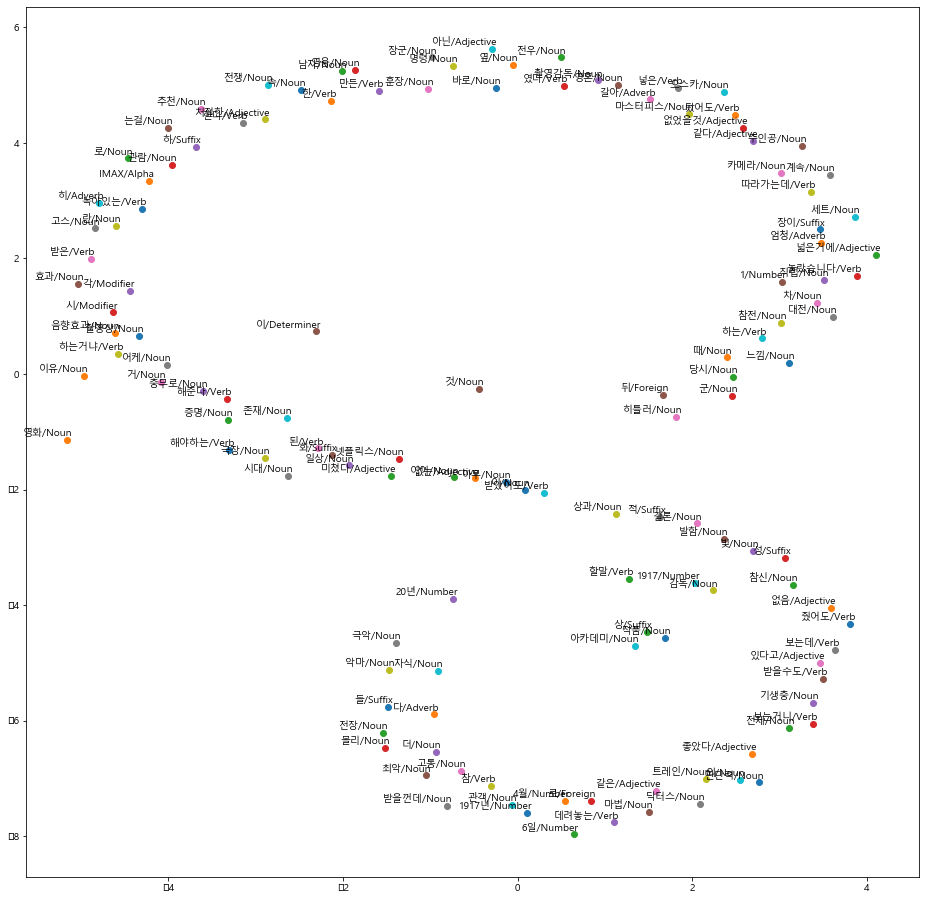

In [20]:
tsne_plot(Skip_Gram_model)

### 인사이트 도출하기!

![image](https://user-images.githubusercontent.com/28949182/77502666-d2dfec80-6e9e-11ea-996e-6974a8a1c79d.png)
촬영감독의 영혼을 갈아 넣은 마스터피스, 탔어도 될것같다 
> 상을 탔어도 될거같다.  사람들이 대부분 영화를 만족스럽게 보았고 평이 좋다.

![image](https://user-images.githubusercontent.com/28949182/77502759-15092e00-6e9f-11ea-9e7b-7f7f873fcfd4.png)

음향효과 어케 하는거냐 시각효과
> 음향효과, 시각효과 에 사람들이 관심을 가지고 있다.

![image](https://user-images.githubusercontent.com/28949182/77502900-8943d180-6e9f-11ea-82dc-4c2df0d47605.png)

주인공을 카메라가 계속 따라가는데 세트장이 넓은거에 놀랐습니다.
> 주인공을 카메라가 계속 따라가는 영화임을 알수 있다.

C:\Users\MiSung\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
C:\Users\MiSung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MiSung\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


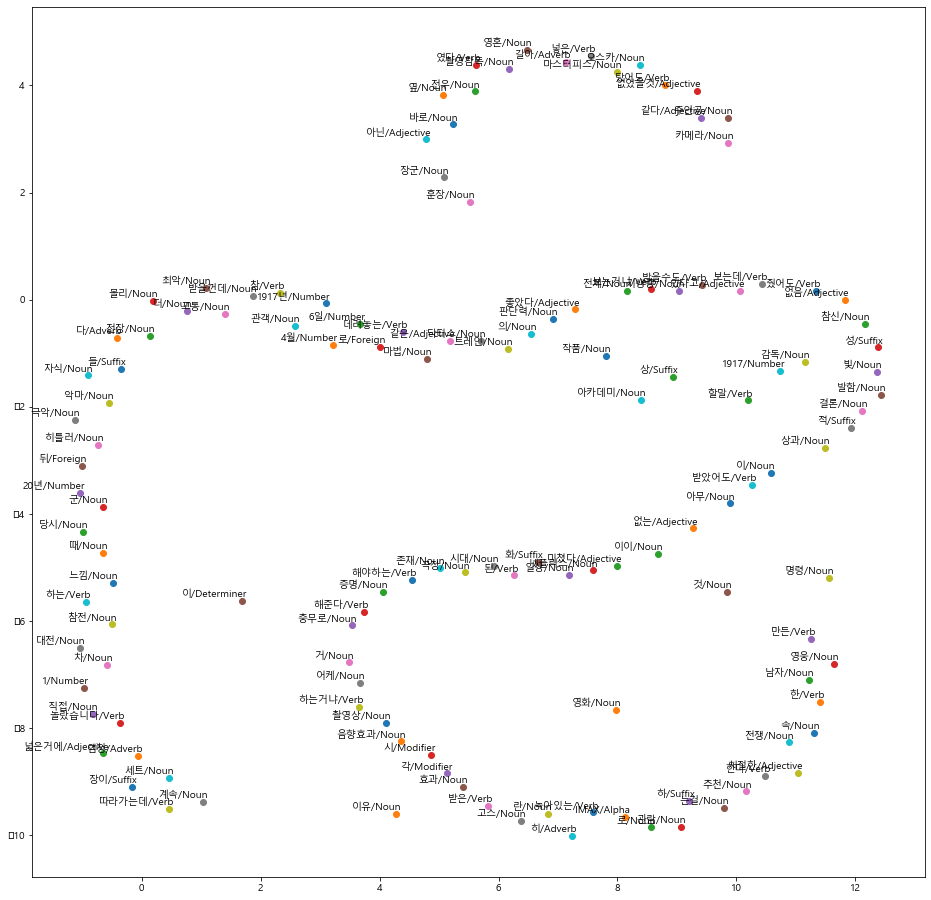

In [21]:
tsne_plot(CBOW)

![image](https://user-images.githubusercontent.com/28949182/77503027-e17ad380-6e9f-11ea-87ef-987e66a1d55c.png)

> 전쟁속 한 영웅의 이야기


![image](https://user-images.githubusercontent.com/28949182/77503091-1850e980-6ea0-11ea-96c8-654cd64a9845.png)

참신성이 빛 발함